In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2023-04-02 07:24:54--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   132MB/s    in 0.2s    

2023-04-02 07:24:54 (132 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
# add your code here - consider creating a new cell for each section of code

In [5]:
df_books

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato


In [6]:
df_ratings

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


In [8]:
df_books['title'].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
Cinderella'S Secret Agent (A Year Of Loving Dangerously) (Silhouette Intimate Moments, No 1076)                                    1
Diamond In The Rough (Temptation , No 688)                           

In [7]:

df_book = pd.merge(df_books,df_ratings,on="isbn")
df_book

,isbn,title,author,user,rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0.0
...,...,...,...,...,...
1031170,0440400988,There's a Bat in Bunk Five,Paula Danziger,276463,7.0
1031171,0525447644,From One to One Hundred,Teri Sloat,276579,4.0
1031172,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,276680,0.0
1031173,0192126040,Republic (World's Classics),Plato,276680,0.0


In [21]:
df_ratingcount = (df_book.groupby('title')['rating'].count()).reset_index()

In [208]:
df_usercount = (df_book.groupby('user')['rating'].count()).reset_index()
df_usercount.rename(columns={'rating':'usertotalrating'},inplace=True)
df_usercount

,user,usertotalrating
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1
...,...,...
92102,278846,1
92103,278849,4
92104,278851,23
92105,278852,1


In [209]:
df_usercount['usertotalrating'].value_counts()

1       51270
2       10811
3        5757
4        3856
5        2699
        ...  
498         1
878         1
772         1
522         1
3996        1
Name: usertotalrating, Length: 662, dtype: int64

In [25]:
df_ratingcount.rename(columns={'rating':'totalrating'},inplace=True)

In [210]:
df_ratcount = pd.merge(df_book,df_ratingcount,on='title')
df_ratcount = pd.merge(df_ratcount,df_usercount,on='user')
df_ratcount

,isbn,title,author,user,rating,totalrating,usertotalrating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0.0,2,1
1,0801319536,Classical Mythology,Mark P. O. Morford,269782,7.0,2,5
2,0140039589,Watership Down,Richard Adams,269782,10.0,312,5
3,0684862719,Pay It Forward: A Novel,Catherine Ryan Hyde,269782,8.0,85,5
4,0671024256,On Writing,Stephen King,269782,0.0,137,5
...,...,...,...,...,...,...,...
1031170,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,246590,6.0,1,1
1031171,0817310916,One Day in the Life of a Born Again Loser: And...,Helen Norris,259416,0.0,1,1
1031172,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,259614,10.0,1,1
1031173,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,259679,6.0,1,1


In [273]:
rating_books = df_ratcount

In [274]:
rating_books = rating_books.where(rating_books['totalrating']>100).dropna(axis=0).reset_index(drop=True)
rating_books = rating_books.where(rating_books['usertotalrating']>100).dropna(axis=0).reset_index(drop=True)

In [222]:
len(df_book.title.unique())

241090

In [275]:
rating_books

,isbn,title,author,user,rating,totalrating,usertotalrating
0,0399135782,The Kitchen God's Wife,Amy Tan,11676.0,9.0,311.0,11144.0
1,080410753X,The Kitchen God's Wife,Amy Tan,11676.0,8.0,311.0,11144.0
2,0440234743,The Testament,John Grisham,11676.0,9.0,617.0,11144.0
3,0385493800,The Testament,John Grisham,11676.0,8.0,617.0,11144.0
4,0099245027,The Testament,John Grisham,11676.0,4.0,617.0,11144.0
...,...,...,...,...,...,...,...
87457,0345351525,The Queen of the Damned (Vampire Chronicles (P...,Anne Rice,183958.0,0.0,274.0,115.0
87458,0767900383,Under the Tuscan Sun,Frances Mayes,183958.0,9.0,184.0,115.0
87459,0930044177,Outlander,Jane Rule,183958.0,8.0,283.0,115.0
87460,009927454X,Midnight in the Garden of Good and Evil,J. Berendt,183958.0,0.0,159.0,115.0


In [76]:
rating_books.loc[rating_books['totalrating']>=500,:]

,isbn,title,author,user,rating,totalrating
311,0440234743,The Testament,John Grisham,277478.0,0.0,617.0
312,0440234743,The Testament,John Grisham,278144.0,0.0,617.0
313,0440234743,The Testament,John Grisham,9.0,0.0,617.0
314,0440234743,The Testament,John Grisham,243.0,0.0,617.0
315,0440234743,The Testament,John Grisham,388.0,0.0,617.0
...,...,...,...,...,...,...
154480,0385315236,The Horse Whisperer,Nicholas Evans,270820.0,8.0,507.0
154481,0385315236,The Horse Whisperer,Nicholas Evans,274061.0,0.0,507.0
154482,0385315236,The Horse Whisperer,Nicholas Evans,275970.0,0.0,507.0
154483,0553474286,The Horse Whisperer,Nicholas Evans,56959.0,0.0,507.0


<Axes: xlabel='rating', ylabel='count'>

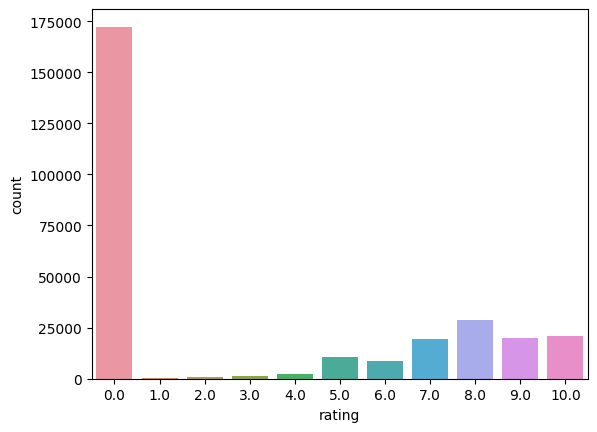

In [82]:
import seaborn as sns

sns.countplot(x='rating',data=rating_books)

In [276]:
rating_books_ = rating_books.pivot_table(columns='user',index='title',values='rating').fillna(0)

In [277]:
rating_books_

user,254.0,507.0,882.0,1424.0,1435.0,1733.0,1903.0,2033.0,2110.0,2276.0,...,275020.0,275970.0,276463.0,276680.0,277427.0,277478.0,277639.0,278137.0,278188.0,278418.0
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
rating_bookscsr = csr_matrix(rating_books_)
rating_bookscsr

<904x1629 sparse matrix of type '<class 'numpy.float32'>'
	with 24060 stored elements in Compressed Sparse Row format>

In [293]:
model_knn = NearestNeighbors(metric='cosine',algorithm='auto',n_neighbors=5)

model_knn.fit(rating_bookscsr)

NearestNeighbors(metric='cosine')

In [110]:
distance,indices = model_knn.kneighbors(rating_books_.iloc[0].values.reshape(1,-1),n_neighbors=6)

In [119]:
distance.flatten()

array([3.5762787e-07, 8.4986746e-01, 8.7736958e-01, 9.1197348e-01,
       9.1611153e-01, 9.1622049e-01], dtype=float32)

In [129]:
rating_books_.loc['1984'].values

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [123]:
for ind in indices:
  print(rating_books_.index[ind],distance)

Index(['1984', 'Animal Farm', 'Brave New World',
       'American Psycho (Vintage Contemporaries)',
       'Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death',
       'Lord of the Flies'],
      dtype='object', name='title') [[3.5762787e-07 8.4986746e-01 8.7736958e-01 9.1197348e-01 9.1611153e-01
  9.1622049e-01]]


In [124]:
for i in range(0,len(distance.flatten())):
  if i == 0:
    print('Recommendations for {0}:\n'.format(rating_books_.index[0]))
  else:
    print(f'{i},{rating_books_.index[indices.flatten()[i]]}, with distance of {distance.flatten()[i]}')

Recommendations for 1984:

1,Animal Farm, with distance of 0.8498674631118774
2,Brave New World, with distance of 0.8773695826530457
3,American Psycho (Vintage Contemporaries), with distance of 0.9119734764099121
4,Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death, with distance of 0.9161115288734436
5,Lord of the Flies, with distance of 0.916220486164093


In [133]:
rating_books_.loc["Where the Heart Is (Oprah's Book Club (Paperback))"]

user
8.0         0.0
9.0         0.0
14.0        0.0
16.0        0.0
17.0        0.0
           ... 
278836.0    0.0
278843.0    0.0
278844.0    0.0
278846.0    0.0
278854.0    0.0
Name: Where the Heart Is (Oprah's Book Club (Paperback)), Length: 38014, dtype: float32

In [300]:
# function to return recommended books - this will be tested
def get_recommends(book):
  recommended_books = [[]]
  distance,indices = model_knn.kneighbors(rating_books_.loc[book].values.reshape(1,-1))
  for i in range(0,len(distance.flatten())):
    if i == 0:
      recommended_books.append(rating_books_.index[indices.flatten()[0]])
    else:
      recommended_books[0].append([rating_books_.index[indices.flatten()[i]], distance.flatten()[i]])
  recommended_books.reverse()
  recommended_books[1].reverse()
  return recommended_books

In [301]:
print(get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))"))

["Where the Heart Is (Oprah's Book Club (Paperback))", [['I Know This Much Is True', 0.8009548], ['The Weight of Water', 0.777629], ['The Lovely Bones: A Novel', 0.7605517], ['Blue Diary', 0.74283123]]]


In [291]:
def get_recommends(book = ""):
    model_knn = NearestNeighbors(metric = 'cosine', n_neighbors=5, algorithm='auto')
    model_knn.fit(rating_bookscsr)

    # found book TODO: user a better search
    for query_index in range(len(rating_books_)):
        if rating_books_.index[query_index] == book:
            break

    # creating return structure
    ret = [rating_books_.index[query_index], []]
    distances, indices = model_knn.kneighbors(rating_books_.iloc[query_index,:].values.reshape(1, -1))
    # now we located the book. lets show the recomendations
    for i in range(1, len(distances.flatten())):
        ret[1].insert(0, [rating_books_.index[indices.flatten()[i]], distances.flatten()[i]])
    return ret

In [302]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['I Know This Much Is True', 0.8009548], ['The Weight of Water', 0.777629], ['The Lovely Bones: A Novel', 0.7605517], ['Blue Diary', 0.74283123]]]
You passed the challenge! 🎉🎉🎉🎉🎉
